# PyTorch Workflow

Let's explore a an example PyTorch ebd-to-end workflow.

Resources:
* Ground truth Notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book Version of Notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a Question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.0+cu121'

## 1. Data (preparing and loading)

In machine learning Data can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use linear regression to create the data with known **parameters** (things that can be learned by a model).
`X` (features) and `y` (labels)

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Split data into training and test sets (One of most important steps in a machine learning in General)

training and test set (and when required, a validation set).

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How must we better visualize our data?

This is where the data explorer's motto comes in
"Visualize,Visualize,Visualize"

In [6]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8, 6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=5, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=5, label="Testing data")

  # are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


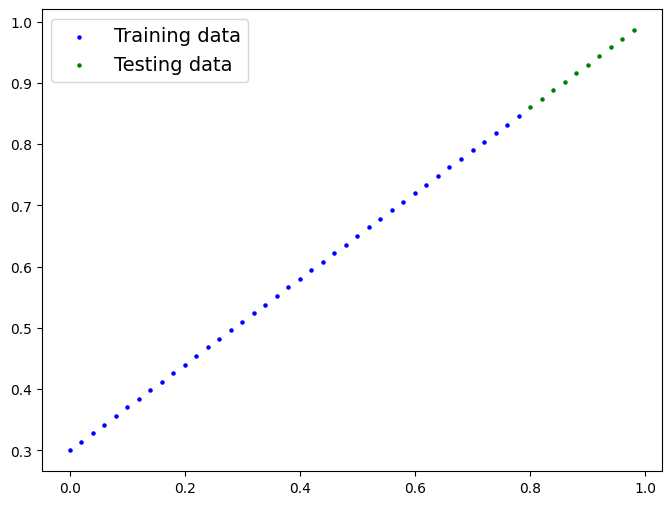

In [7]:
plot_predictions();

## 2. Build model

Our first PyTorch Model

This is very Exciting...

What our Model does:
* Start with Random values (weights and bias)
* Look at Training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and bias values we used to create the data)

How it does do so

Through two main algorithms:
1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                            requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                          dtype=torch.float), # <- PyTorch loves float32 by default
                                          requires_grad=True) # <- can we update this value with gradient descent?))

  # Forward defines the computation in the model
  def forward(self,X:torch.Tensor)->torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weights * X + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch model building essentials

* torch.nn -	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
* torch.nn.Parameter -	Parameter should our model try and learn, Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
*torch.nn.Module -	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented(Override).
* torch.optim -	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
* def forward() -	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

### Checking the contents of a PyTorch model

Now we've Created a model,let's see what's inside...

So we can check our model Parameters or what's inside our model ```.parameters()```

We can also get the state (what the model contains) of the model using .```state_dict()```

In [9]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` base on `X_test`.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

In [11]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [12]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


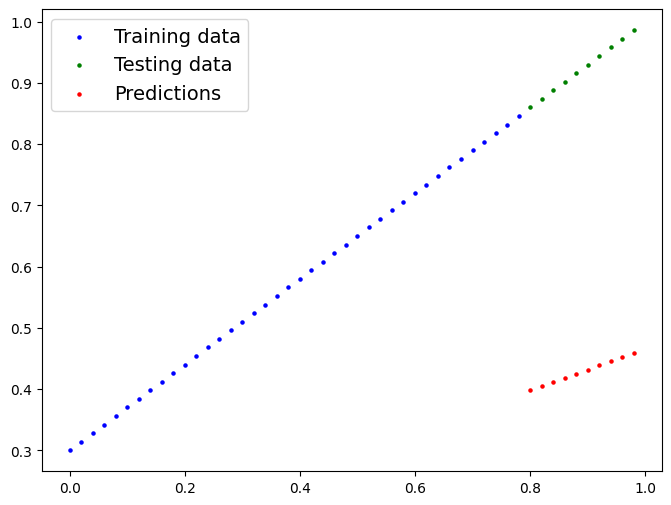

In [13]:
plot_predictions(predictions=y_preds)

##3. Train model

The Whole idea of traning is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a
loss function.

* Note: Loss function may also be called cost function or criterion in different
areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure Measures how wrong your model's predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.
to the ideal outputs, lower is better.
* **Optimizer :** Takes into account the loss of a model and adjusts the model's
parameters (e.g. weight & bias) to improve loss function. Tells your model how to update its internal parameters to best lower the loss.
  * Inside the optimizer you'll often have to set two parameters:
    * ```params``` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * ```lr``` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters
with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Creating a loss function and optimizer in PyTorch

In [16]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

>**Q:** Which loss function and optimizer should I use?
>
>**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular
problem set.
>
>For example, for a regression problem (like ours), a loss function of ``nn.L1Loss()`` and an optimizer like ``torch.optim.SGD()`` will suffice.
>
>But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of ``nn.BCELoss()`` (binary cross entropy loss].




### Building a Training loop (and a testing loop) in PyTorch

A Couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()`
functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [17]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data,this is a hyperparameter because we've set it)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# 0. Loop through the data
for epoch in range(epochs):
  ### Training

  # Put model in training mode (this is the default state of a model)
  model_0.train() # traing mode in PyTorch set all parameters that require gradient to require gradient

  # 1. Forward pass on train data using the forward() method inside
  y_pred  = model_0(X_train)
  # print(y_pred)

  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fn(y_pred,y_train)

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards - Perform backpropagation on the loss with respect to the parameters of the model (Calculate the gradient of each parameter)
  loss.backward()

  # 5. Step the optimizer (Perform gradient descent)
  optimizer.step() # by default how the optimizer change will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing

  # Put the model in evaluation mode
  model_0.eval() # turns off gradient tracking / turn off different settings in model not needed for evaluation/testing (Dropout Batch Normalization Layers)

  with torch.inference_mode(): # Turn off gradient tracking and a couple more things behind the scenes
    # 1. Forward pass on test data
    test_pred = model_0(X_test)

    # 2. Caculate loss on test data
    test_loss = loss_fn(test_pred, y_test) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

    if epoch % 10 == 0:
      # Print out what's happening
      epoch_count.append(epoch)
      train_loss_values.append(loss.numpy())
      test_loss_values.append(test_loss.numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

      # Print out model state_dict()
      print(model_0.state_dict())

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | MAE Train Loss: 0.03818932920694351 

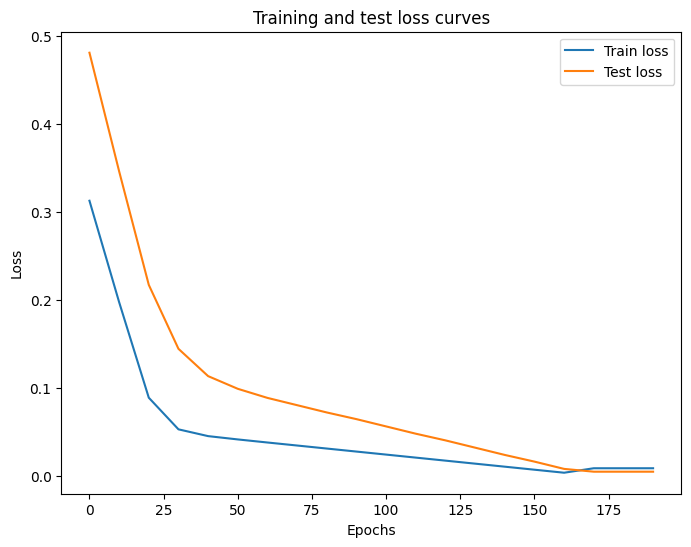

In [18]:
# Plot the loss curves
plt.figure(figsize=(8,6))
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

In [19]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


##4. Making predictions with a trained PyTorch model (inference)

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

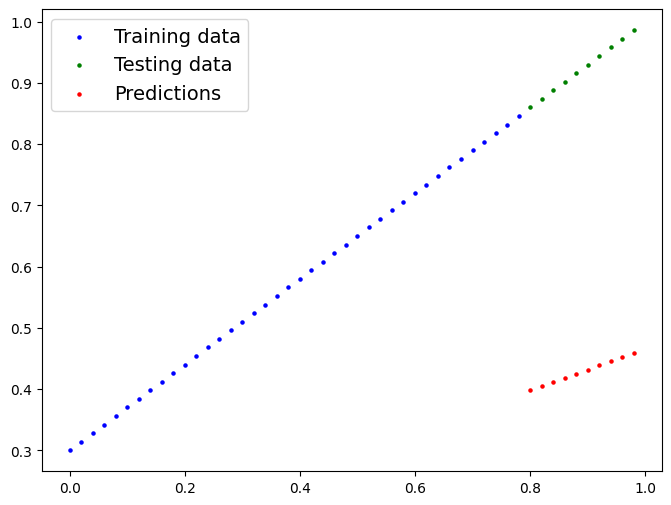

In [21]:
plot_predictions(predictions=y_preds)

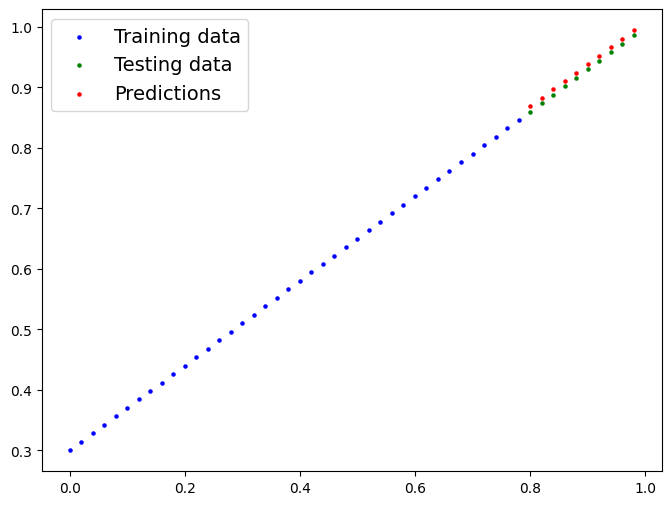

In [22]:
plot_predictions(predictions=y_preds_new)

##5. Saving and loading a PyTorch model

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save` - Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
2. `torch.load` - Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
3. `torch.nn.Module.load_state_dict` - Loads a model's parameter dictionary (`model.state_dict()`) using a `saved state_dict()` object.

In [23]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [24]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Nov  7 12:37 models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch Model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True))

<All keys matched successfully>

In [27]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [29]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together



In [30]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.0+cu121'

In [31]:
# Setup device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# torch.set_default_device(device)
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [32]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

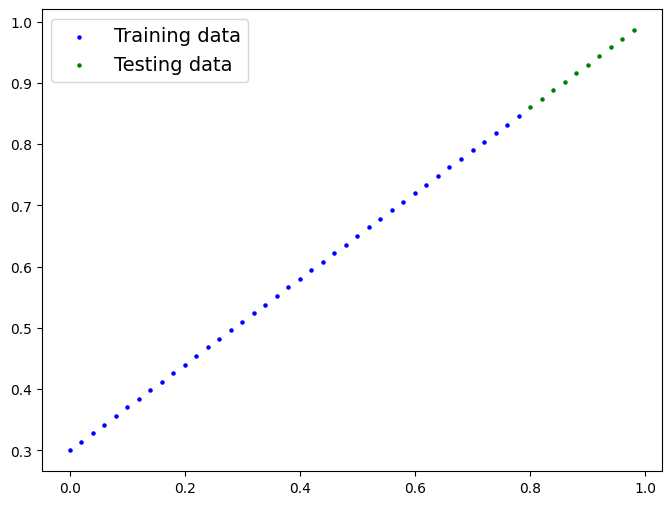

In [34]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

In [35]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called :linear transform, probing layer, fully connected layer,dense layer
    self.linear_layer = nn.Linear(in_features = 1,out_features = 1)

  # Define the forward computation (input data x flows through nn.Linear())
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed when creating the model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [36]:
# Check model current device
next(model_1.parameters()).device

device(type='cpu')

In [37]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

In [38]:
# Create loss function
loss_fn = nn.L1Loss() # Same as MAE

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [39]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train() # train mode is on by default after construction

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred,y_train)

  # 3. Zero grad optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_1.eval()# put the model in evaluation mode for testing (inference)

  with torch.inference_mode():
    # 1. Forward pass
    test_pred  = model_1(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249


In [40]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### 6.4 Making predictions

In [41]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

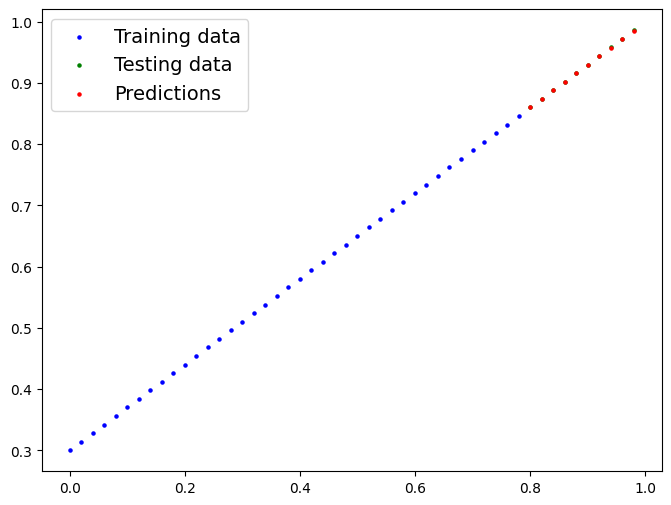

In [42]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a model

In [43]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [45]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH,weights_only=True))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [46]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')